In [1]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
(train_input, train_target) , (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
train_scaled =train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target =train_test_split( train_scaled,train_target,test_size=0.2,random_state=42)


In [3]:
model =keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu', padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))



Metal device set to: Apple M1 Pro


2022-11-17 13:58:21.507613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-17 13:58:21.507771: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))




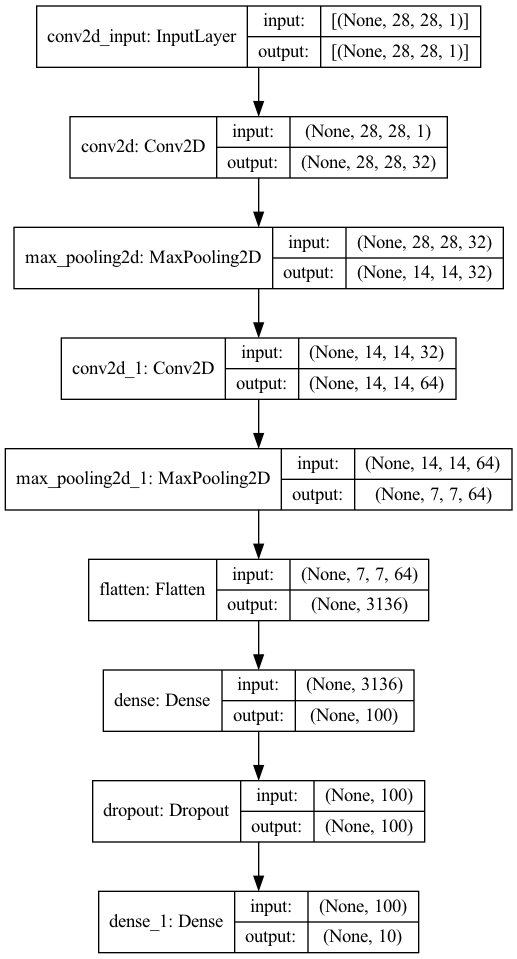

In [5]:
keras.utils.plot_model(model,show_shapes=True)

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb =keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb =keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history =model.fit(train_scaled,train_target,epochs=3, validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

2022-11-17 13:58:47.183229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-17 13:58:47.184255: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-17 13:58:47.328227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/3
1497/1500 [============================>.] - ETA: 0s - loss: 0.5027 - accuracy: 0.8196

2022-11-17 13:58:56.784355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 11s 7ms/step - loss: 0.5025 - accuracy: 0.8196 - val_loss: 0.3399 - val_accuracy: 0.8783
Epoch 2/3
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3360 - accuracy: 0.8806 - val_loss: 0.2829 - val_accuracy: 0.8971
Epoch 3/3
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2846 - accuracy: 0.8975 - val_loss: 0.2618 - val_accuracy: 0.9014
